# Extracción de datos en Python

En este notebook hay ejemplos de cómo trabajar con distintos origenes de datos.

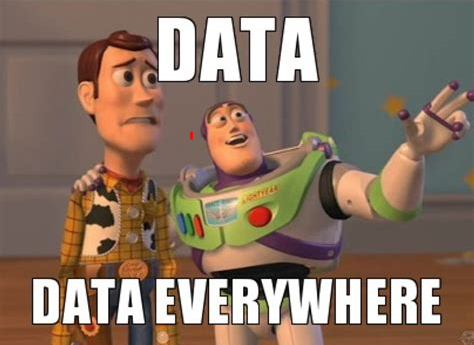

# Librerías y funciones

In [1]:
#Librerias utilizadas en el punto 0
import pyodbc
#Librerías utilizadas en el punto 0 y en todas los siguientes
import pandas as pd
#Librerías utilizadas en el punto 2
import urllib.request
import zipfile
import os
#Librerias utilizadas en el punto 3
import geopandas as gpd
import matplotlib.pyplot as plt
#Librerias utilizadas en el punto 4
import json
#Librerías utilizadas en el punto 5
import PyPDF2
from tika import parser
import tabula
#Librerias utilizadas en el punto 6
from geopy.geocoders import Nominatim
import pandas_datareader.data as web
import requests
#Librerias utilizadas en el punto 7
import getpass
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import time
import requests
#Librerias bonus track 2
from PIL import Image
import pytesseract

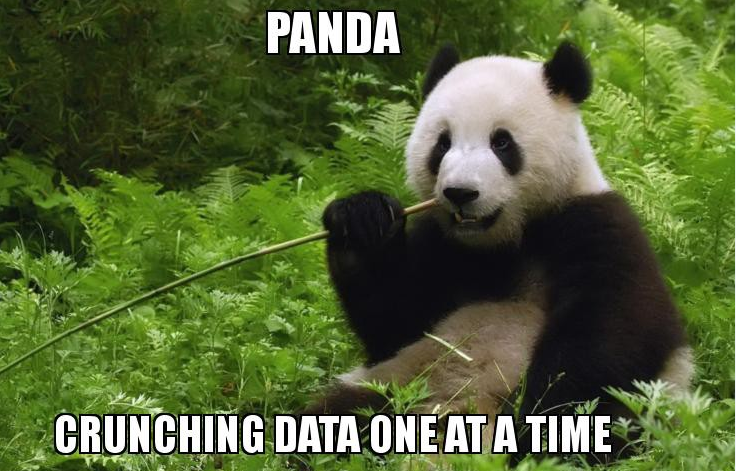

# 0) SQL

In [2]:
##Con este código verifico el driver instalado
driver_name = ''
driver_names = [x for x in pyodbc.drivers() if x.endswith(' for SQL Server')]
if driver_names:
    driver_name = driver_names[0]
if driver_name:
    conn_str = 'DRIVER={}; ...'.format(driver_name)
    # then continue with ...
    # pyodbc.connect(conn_str)
    # ... etc.
else:
    print('(No suitable driver found. Cannot connect.)')
conn_str
driver_name

'ODBC Driver 13 for SQL Server'

In [ ]:
##Defino los parametros de conexion
server = 'Nombreservidor' 
database = 'Nombretabla'
driver="{ODBC Driver 17 for SQL Server}" ##Versión del SQL
##El parametro trusted_connection = 'yes', indica que nos conectamos con credenciales integradas, es decir con AD.
cnxn = pyodbc.connect(driver=driver, server=server, database=database, trusted_connection='yes')

datasql=pd.read_sql("select top 10 * from Nombretabla", cnxn)
datasql.head()

# 1) Archivos .TXT, .XLSX, .CSV.

In [4]:
#Ruta que contiene el archivo .txt
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploTXT.txt"

#Cargo el archivo sin formateos
#data = pd.read_csv(ruta) 

#Cargo el archivo con formateos
data = pd.read_csv(ruta, header=None, sep=';', encoding="utf-8" , error_bad_lines=False) 
#Defino las columnas
data.columns = ['fecha_pub', 'fecha_vig_desde', 'fecha_vig_hasta','cuit',' tipo_contr_insc','marca_alta_sujeto','marca_alicuota','alicuota_percepcion','alicuota_retencion','nro_grupo_perc','nro_grupo_ret','razon_social']

#Chequeo información
data.head()

,fecha_pub,fecha_vig_desde,fecha_vig_hasta,cuit,tipo_contr_insc,marca_alta_sujeto,marca_alicuota,alicuota_percepcion,alicuota_retencion,nro_grupo_perc,nro_grupo_ret,razon_social
0,22052020,1062020,30062020,20000163989,D,S,N,"0,00","0,00",0,0,ETCHEVERRIGARAY JUAN CARLOS
1,22052020,1062020,30062020,20000182274,D,S,N,"0,00","0,00",0,0,SA&UDO CLEMENTINO
2,22052020,1062020,30062020,20000182770,D,S,N,"0,00","0,00",0,0,NaN
3,22052020,1062020,30062020,20000188299,D,S,N,"0,00","0,00",0,0,NaN
4,22052020,1062020,30062020,20000202887,D,S,N,"0,00","0,00",0,0,NaN


In [5]:
#Ruta que contiene el archivo .txt
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploCSV-Comentarios.csv"

#Cargo el archivo correctamente
data = pd.read_table(ruta, sep= ';',skiprows = [0,1,2,3,4,5,6,7,8,9,11])

#Chequeo info
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
#Ruta que contiene el archivo .xlsx
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploExcel.xlsx"

#Cargo el archivo sin formateos ya que read_excel lo interpreta sin problema
data = pd.read_excel(ruta) 

#Chequeo información
data.head()

,NPS,Experiencia,Segmento,Verbatim
0,0,Customer Service,Cartera General,No cumplen con lo que dicen... No dan solucion...
1,1,Customer Service,Cartera General,Pague mi cuenta más de un año jamás informaron...
2,0,Customer Service,Cartera General,Son una mierda
3,9,ATM,Personal Bank,Por la calidez de su gente en la atención pers...
4,9,ATM,Cartera General,Es una plataforma amigable y agil


In [7]:
#Ruta que contiene el archivo .csv
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploCSV.csv"

#Cargo el archivo csv
data = pd.read_csv(ruta) 

#Chequeo información
data.head()

,mes,ID1,segmento,Bancos1,Bancos2,BPublico,CA_SUM_CRED,CA_SUM_DEB,Cant_ATM,Cant_CA,...,Top10,Top100,Top20,Top3,TX_Compras,TX_Consumos,uso_tc_cant,uso_tc_promedio3,UT,VD
0,201806,ORTUQT,FNCG,0.0,0.0,0.0,45321.68,-33767.73,0,2,...,0.0,1.0,0.0,0.0,19,25,0.0,0.0,0.887278,0
1,201806,EYTEOP,FNMO,1.0,1.0,0.0,NaN,NaN,0,0,...,0.0,1.0,0.0,1.0,3,4,1.0,1888.0,0.380645,0
2,201806,YPIUOI,FNCG,0.0,0.0,0.0,863.06,-10862.99,1,2,...,0.0,1.0,0.0,0.0,10,11,0.0,0.0,0.117777,0
3,201806,A76HA7,FNCG,1.0,1.0,0.0,350.82,-350.82,0,2,...,1.0,1.0,0.0,0.0,6,0,1.0,7070.0,0.618932,0
4,201806,YPRWIW,FNCG,1.0,1.0,0.0,44645.34,-33831.56,0,2,...,0.0,1.0,0.0,1.0,1,2,1.0,19000.0,0.315833,0


# 2) Archivos desde internet y .zip

Ejemplo de cómo descargar un archivo .zip desde la web y trabajarlo de manera automática

### Paso 1 - Bajar archivo

In [8]:
#Bajar archivo
url = "http://www.afip.gob.ar/genericos/cInscripcion/archivos/apellidoNombreDenominacion.zip"
destino = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/archivo.zip"
fG = urllib.request.urlopen(url)
fichero = open(destino,"wb")
fichero.write(fG.read())
fichero.close()

### Paso 2 - Descomprimir

In [10]:
#Descomprimir
ruta_zip = destino
ruta_extraccion = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/"
password = None
archivo_zip = zipfile.ZipFile(ruta_zip, "r")
try:
    print(archivo_zip.namelist())
    archivo_zip.extractall(pwd=password, path=ruta_extraccion)
except:
    pass
archivo_zip.close()
nombre = archivo_zip.namelist()

['utlfile/padr/SELE-SAL-CONSTA.p20out1.20200801.tmp']


In [12]:
#renombrar archivo (Paso optativo)
#archivo = "C:/Users/ROM13066/Desktop/Test/utlfile/padr/SELE-SAL-CONSTA.p20out1.20200606.tmp"
archivo = ruta_extraccion+nombre[0]
nombre_nuevo = ruta_extraccion+"prueba.txt"
os.rename(archivo, nombre_nuevo)


### Paso 3 - Cargar el archivo en el Dataframe

In [14]:
nombre_nuevo = ruta_extraccion+"Pruebaok.txt"
#Visualizo como es el archivo
data = pd.read_fwf(nombre_nuevo, header=None) 
data.head()

##Genero el formateo
headings = ['CUIT', 'DENOMINACION', 'IMP_GANANCIAS', 'IMP_IVA','MONOTRIBUTO','INTEGRANTE_SOC','EMPLEADOR','ACTIVIDAD_MONOTRIBUTO']
#Declaro la delimitación por posición
colspecs = [(0, 11), (11, 41), (41, 43), (43, 45), (45, 47), (47, 48), (48, 49), (49, 52)]

#Cargo el archivo con los parametros definidos
data = pd.read_fwf(nombre_nuevo, names=headings, header=None, colspecs=colspecs)

data.head()

,CUIT,DENOMINACION,IMP_GANANCIAS,IMP_IVA,MONOTRIBUTO,INTEGRANTE_SOC,EMPLEADOR,ACTIVIDAD_MONOTRIBUTO
0,20000033481,SUCESION DE PERROTTA CAYETANO,AC,AC,NI,N,S,0
1,20000035891,MULLER CARLOS JORGE,NI,AC,NI,N,N,0
2,20000179672,CANTARELLA ADELINA,AC,NI,NI,N,N,0
3,20000278417,SUCESION DE GEROSA RICARDO ANG,AC,AC,NI,N,N,0
4,20000684830,SUCESION DE BASAÑES ZAVALLA AL,AC,AC,NI,N,S,0


# 3) Archivos geoespaciales

Son archivos que nos permiten trabajar con mapas y ubicaciones.
Les dejo un link que me sirvió para empezar a trabajar con geopandas: http://www.geomapik.com/desarrollo-programacion-gis/mapas-con-python-geopandas-matplotlib/

In [15]:
#Declaro ruta de archivo SHP SHAPEFILE
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/SHP/Buenos_Aires_con_datos.shp"
#Cargo archivo
mapa = gpd.read_file(ruta)

#Visualizo
mapa.head()

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,331355,068821704,997.0,1006.0,2003.0,485.0,483.0,460.0,"POLYGON ((4142783.715 6204147.299, 4142803.034..."
1,334455,060141201,31.0,25.0,56.0,17.0,32.0,17.0,"POLYGON ((4011946.219 5760129.432, 4012530.650..."
2,334456,060210206,98.0,79.0,177.0,58.0,76.0,58.0,"POLYGON ((4011381.455 6127277.808, 4011507.774..."
3,334452,060070107,104.0,112.0,216.0,64.0,97.0,63.0,"POLYGON ((3737590.166 5925087.550, 3737434.205..."
4,334458,060210609,39.0,41.0,80.0,26.0,49.0,26.0,"POLYGON ((4023680.185 6113674.127, 4025092.928..."


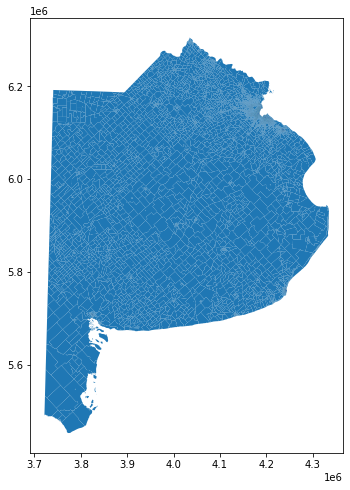

In [16]:
fig,ax = plt.subplots(figsize=(8,8))
mapa.plot(ax=ax)

In [20]:
#Declaro ruta de archivo geojson
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploGEOJSON.geojson"
#Agrego mapa shp como capa
mapaargentina = gpd.read_file("C:/Users/ROM13066/Desktop/Archivos de ejemplos/SHP/ign_departamento/ign_departamento.shp")

#Cargo archivo
mapa = gpd.read_file(ruta)

#Visualizo
mapa.head()

,nombre_completo,fuente,iso_id,nombre,id,categoria,iso_nombre,geometry
0,Provincia de Misiones,IGN,AR-N,Misiones,54,Provincia,Misiones,POINT (-54.65170 -26.87540)
1,Provincia de San Luis,IGN,AR-D,San Luis,74,Provincia,San Luis,POINT (-66.02813 -33.75773)
2,Provincia de San Juan,IGN,AR-J,San Juan,70,Provincia,San Juan,POINT (-68.88949 -30.86537)
3,Provincia de Entre Ríos,IGN,AR-E,Entre Ríos,30,Provincia,Entre Ríos,POINT (-59.20145 -32.05887)
4,Provincia de Santa Cruz,IGN,AR-Z,Santa Cruz,78,Provincia,Santa Cruz,POINT (-69.95576 -48.81549)


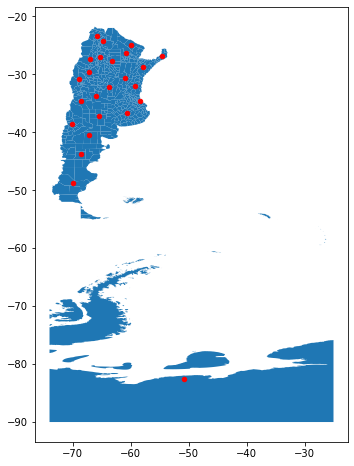

In [21]:
fig,ax = plt.subplots(figsize=(8,8))
#Agrego capa
mapaargentina.plot(ax=ax)
mapa.plot(ax=ax,markersize = 20, color = 'red', marker = 'o')

# 4) Archivos JSON
Ejemplos de orientación:
https://datatofish.com/load-json-pandas-dataframe/

In [22]:
#Declaro ruta de archivo json
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploJSON-VALUES.json"

#Cargo archivo, con orientación index por cómo está hecho (ver link del metodo pd.read_json)
data = pd.read_json(ruta, orient='values')

#Visualizo
data.head()

,0,1
0,Tarjeta,1
1,Seguro,2
2,Plazo Fijo,4
3,Prestamo,3


In [23]:
#Declaro ruta de archivo json
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploJSON.json"

#Cargo archivo
data = pd.read_json(ruta)

#Visualizo
data.head()

,Producto,Prioridad
0,Tarjeta,1
1,Seguro,2
2,Plazo Fijo,4
3,Prestamo,3


In [24]:
##Usando la librería json
data="C:/Users/ROM13066/Desktop/Archivos de ejemplos/data.json"

with open(data) as archivo:
    data = json.load(archivo)

for client in data['clients']:
    print('First name:', client['first_name'])
    print('Last name:', client['last_name'])
    print('Age:', client['age'])
    print('Amount:', client['amount'])
    print('')
    
data

First name: Sigrid
Last name: Mannock
Age: 27
Amount: 7.17

First name: Joe
Last name: Hinners
Age: 31
Amount: [1.9, 5.5]

First name: Theodoric
Last name: Rivers
Age: 36
Amount: 1.11



{'clients': [{'first_name': 'Sigrid',
   'last_name': 'Mannock',
   'age': 27,
   'amount': 7.17},
  {'first_name': 'Joe',
   'last_name': 'Hinners',
   'age': 31,
   'amount': [1.9, 5.5]},
  {'first_name': 'Theodoric',
   'last_name': 'Rivers',
   'age': 36,
   'amount': 1.11}]}

# 5) Archivos PDF
Librerías para leer archivos PDF

In [25]:
#Archivo pdf
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploPDF.pdf"

#utilizo la librerua pypdf2
read_pdf = PyPDF2.PdfFileReader(ruta)

page = read_pdf.getPage(0)
page_content = page.extractText()
print(page_content)


  

-
 

 
 
 
 
COMUNICACIÓN  

C

  
87443
 
9/6/2020
 
A LAS ENTIDADES FINANCIERAS,
 
A LOS OPERADORES DE CAMB
IO:
 
 
Ref.:
 
 
Suspensión de Operaciones de Cambio. Ex-
pte. Nº 101.160/15.
 
 
____________________________________________________________
 
 
Nos dirigimos a Uds.
 
para comunicarles que, en el marco del Expte. 101.160/15, 
mediante Resolución N° 76/20 se ha dispuesto que, sin la previa autorización de este Banco, no 
deberán dar curso a operaciones de cambio o, en su caso, a su anulación, a nomb
re o por cuenta 
de:
 
 
 

 
Jorge Alberto Sacco. D.N.I. Nº 11.224.400. C.U.I.T. 20
-
11224400
-
0. 
 
 

 
Ricardo Alberto Durante. D.N.I. Nº 11.355.198. C.U.I.T. 20
-
11355198
-
5.
 
 

 
SACCO JORGE A. Y DURANTE RICARDO A. S.H. C.U.I.T. Nº 30
-
70884413
-
2.
 
 
 
Asimismo, deberán abste
nerse de transmitir al exterior las operaciones que se 
hubieren formalizado y que a la fecha se encontraren pendientes de aviso a los corresponsales.
 
 
Estas medidas precautorias son a

In [27]:
#Ruta del archivo
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploPDF.pdf"

#Utilizo la libreria TIKA
data = parser.from_file(ruta)

#Formateo y me quedo con lo que necesito
lista = data['content'].splitlines()
lista[83:90]

['\uf0b7 Jorge Alberto Sacco. D.N.I. Nº 11.224.400. C.U.I.T. 20-11224400-0.  ',
 ' ',
 '',
 '\uf0b7 Ricardo Alberto Durante. D.N.I. Nº 11.355.198. C.U.I.T. 20-11355198-5. ',
 ' ',
 '',
 '\uf0b7 SACCO JORGE A. Y DURANTE RICARDO A. S.H. C.U.I.T. Nº 30-70884413-2. ']

In [28]:
#Archivo PDF con tablas
ruta = "C:/Users/ROM13066/Desktop/Archivos de ejemplos/EjemploPDF-Tablas.pdf"

#Cargo el archivo con la librería tabula
data = tabula.read_pdf(ruta, pages='all', encoding = 'utf-8') 

#Chequeo la información
#data
data[2].head()

Got stderr: ago 06, 2020 10:34:04 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFORMACIÓN: OpenType Layout tables used in font ArialMT are not implemented in PDFBox and will be ignored



,No de Orden,Depto,División,Inspector,Supervisor,No de CUIT,Razón Social,Fecha de Inicio,Fecha\rdevol/transf.
0,1,E,5,FIEL CECILIA,GUMUCIO HUMBERTO,30710852894,1969 S.A.,02/03/2020,NaN
1,2,G,4,VALDES DAMIAN,BECEIRO MARCELO,30714952591,2 CABEZAS Y CIA SRL,26/08/2019,NaN
2,3,E,5,DOMINGUEZ MARIA LUZ,GUMUCIO HUMBERTO,30709922358,21 DE FEBRERO S.R.L.,16/03/2020,NaN
3,4,C,1,PETRONE MARIA,EDREIRA NORMA,30710668562,40 KM MOTOS SA,19/10/2018,NaN
4,5,C,1,LOPEZ KADAR MARCELO,EDREIRA NORMA,30711358591,415 CONSTRUCTORA SA,31/01/2020,NaN


# 6) API's
Ejemplos de como trabajar con APIs

In [29]:
#Declaro el agente e ingreso una dirección
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('calle 104 n166 guernica')
print(location)
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

#Creo el dataframe con la información recuperada
data=pd.DataFrame({'direccion_normalizada':[location],'latitud':[location.latitude],'longitud':[location.longitude]})
data.head()

Calle 104, Guernica, Partido de Presidente Perón, Buenos Aires, 1862, Argentina
Latitude = -34.9078582, Longitude = -58.3700975


,direccion_normalizada,latitud,longitud
0,"(Calle 104, Guernica, Partido de Presidente Pe...",-34.907858,-58.370097


In [33]:
#Llamo a la API de Yahoo Finanzas
data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'AMZN', 'WFC']}

#Creo un DF de precio
precio = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in data.items()})
#Creo un DF de volumen
volumen = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in data.items()})

data
volumen.head()

,AAPL,IBM,AMZN,WFC
Date,,,,
2015-08-10,54951600.0,4613400.0,2615900,12397500.0
2015-08-11,97082800.0,3167100.0,2676600,15425500.0
2015-08-12,101217500.0,3560300.0,3962300,21663200.0
2015-08-13,48535800.0,2533400.0,2895200,11868600.0
2015-08-14,42929500.0,3226400.0,1994800,9742500.0


In [35]:
##Esta API nos dá los ultimos 30 issues de github a través de formato JSON
#defino la url
url = 'https://api.github.com/repos/pandas-dev/pandas/issues' 
#utilizamos la libreria requests para hacer el post o llamada
resp = requests.get(url)

#Leemos la respuesta en formato json
datos = resp.json()
datos

#Creo el dataframe
issues = pd.DataFrame(datos, columns=['number', 'title',
                  'labels', 'state'])
issues.head()

,number,title,labels,state
0,35592,REF: Simplify Index.copy,"[{'id': 1465286368, 'node_id': 'MDU6TGFiZWwxND...",open
1,35590,BUG: validate index/data length match in DataF...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
2,35588,BUG: fix styler cell_ids arg so that blank sty...,"[{'id': 1728592794, 'node_id': 'MDU6TGFiZWwxNz...",open
3,35587,Ensure file is closed promptly in case of error,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
4,35586,BUG: Pandas Styler cell_ids Arg,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open


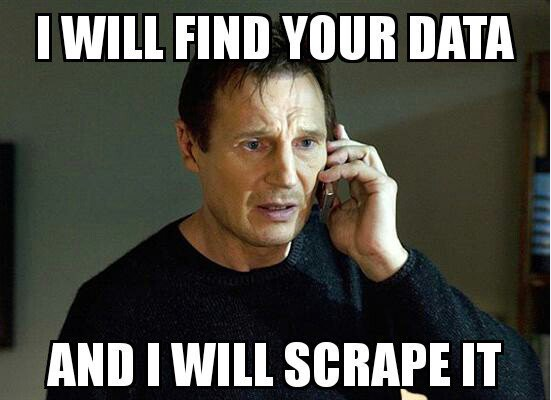

# 7) Web Scrapping
Diferentes métodos para obtener información de páginas webs

In [40]:
#Dirección o URL que quiero traerme
data = pd.read_html('http://www.portaldemarcas.com/rubros/1/indumentaria.html',  flavor='html5lib')

#Chequear info
data[0]

#De lo que devuelve me quedo con una celda y lo separo para formar una lista
lista=list()
lista=data[0].iloc[1,1]
lista=lista.split("  ")
lista

['.X.MARCA',
 '---',
 '+Vision',
 '47 Street',
 'A+',
 'A.Y Not Dead.',
 'Adidas',
 'Agarrate Catalina',
 'Airborn',
 'Akiabara',
 'Allo Martinez',
 'Amphora',
 'Ana Walsh',
 'Apio Verde',
 'Apple-iPoint',
 'Apple-MacStation',
 'Aridza',
 'Arredo',
 'Artentino',
 'Asterisco',
 'Astton',
 'Atomik',
 'Awada',
 'Ayres',
 'Ballon City',
 'BedTime',
 'Bensimon',
 'Billabong',
 'Blaqué',
 'Boating',
 'Bolivia',
 'Bowen',
 'Brooksfield',
 'Bross',
 'Cara Cruz',
 'Cardón',
 'Carla Danelli',
 'Carmela Achaval',
 'Caro Cuore',
 'Cebra',
 'Chatelet',
 'Cheeky',
 'Chocolate',
 'Christian Lacroix',
 'Citykids',
 'Clara Ibarguren',
 'Claro',
 'Class Life',
 'Clona',
 'Cocot',
 'Columbia',
 'Como Quieres que te Quiera',
 'Compañia de Juguetes',
 'Complot',
 'Compumundo',
 'Converse',
 'Creciendo',
 'Cristobal Colon',
 'Cuesta Blanca',
 'Cultura',
 'Cuspide',
 'Danfer',
 'Daniel Cassin',
 'Daniel Hechter',
 'Davor',
 'De la Ostia',
 'Desiderata',
 'Devré',
 'Dexter',
 'Diesel',
 'Distal',
 'Doma',
 'E

In [42]:
#Defino la url que voy a scrappear 
url = 'https://www.afip.gob.ar/monotributo/categorias.asp'

#Utilizo la libreria requests para hacer el post y traerme el html
page = requests.get(url)

#Trabajo con las tablas y visualizo la información
data = pd.read_html(page.content,flavor='html5lib') #Puedo usar esto para las tablas dinamicas.
data[1]
#page.content


Categ. Ingresos Brutos             Actividad Cantidad Mínima de Empleados  \
   Categ. Ingresos Brutos             Actividad Cantidad Mínima de Empleados   
0       A    $ 138.127,99           No excluida                  No requiere   
1       B    $ 207.191,98           No excluida                  No requiere   
2       C    $ 276.255,98           No excluida                  No requiere   
3       D    $ 414.383,98           No excluida                  No requiere   
4       E    $ 552.511,95           No excluida                  No requiere   
5       F    $ 690.639,95           No excluida                  No requiere   
6       G    $ 828.767,94           No excluida                  No requiere   
7       H  $ 1.151.066,58           No excluida                  No requiere   
8       I  $ 1.352.503,24  Venta de Bs. muebles                  No requiere   
9       J  $ 1.553.939,89  Venta de Bs. muebles                  No requiere   
10      K  $ 1.726.599,88  Venta de Bs. muebles                  No requiere   

   Sup. Afectada (*) Energía Eléctrica Consumida Anualmente  \
   Sup. Afectada (*) Energía Eléctrica Consumida Anualmente   
0        Hasta 30 m2                          Hasta 3330 Kw   
1        Hasta 45 m2                          Hasta 5000 Kw   
2        Hasta 60 m2                          Hasta 6700 Kw   
3        Hasta 85 m2                         Hasta 10000 Kw   
4       Hasta 110 m2                         Hasta 13000 Kw   
5       Hasta 150 m2                         Hasta 16500 Kw   
6       Hasta 200 m2                         Hasta 20000 Kw   
7       Hasta 200 m2                         Hasta 20000 Kw   
8       Hasta 200 m2                         Hasta 20000 Kw   
9       Hasta 200 m2                         Hasta 20000 Kw   
10      Hasta 200 m2                         Hasta 20000 Kw   

   Alquileres Devengados Anualmente                       Impuesto Integrado  \
   Alquileres Devengados Anualmente Locaciones y/o Prestaciones de Servicios   
0                          $ 51.798                                 $ 111,81   
1                          $ 51.798                                 $ 215,42   
2                      $ 103.595,99                                 $ 368,34   
3                      $ 103.595,99                                 $ 605,13   
4                      $ 129.083,89                               $ 1.151,06   
5                      $ 129.494,98                               $ 1.583,54   
6                      $ 155.393,99                               $ 2.014,37   
7                      $ 207.191,98                               $ 4.604,26   
8                      $ 207.191,98                                        -   
9                      $ 207.191,98                                        -   
10                     $ 207.191,98                                        -   

                          Aportes al SIPA (**) Aportes Obra Social (***)  \
   Venta de Cosas Muebles Aportes al SIPA (**) Aportes Obra Social (***)   
0                $ 111,81             $ 493,31                     $ 689   
1                $ 215,42             $ 542,64                     $ 689   
2                $ 340,38             $ 596,91                     $ 689   
3                $ 559,09              $ 656,6                     $ 689   
4                $ 892,89             $ 722,26                     $ 689   
5              $ 1.165,86             $ 794,48                     $ 689   
6              $ 1.453,62             $ 873,93                     $ 689   
7              $ 3.568,31             $ 961,32                     $ 689   
8              $ 5.755,33           $ 1.057,46                     $ 689   
9              $ 6.763,34           $ 1.163,21                     $ 689   
10              $ 7.769,7           $ 1.279,52                     $ 689   

                                      Total                         
   Locaciones y/o prestaciones de servicios

In [54]:
#Defino la url que voy a scrappear 
url = 'http://www.bcra.gov.ar/PublicacionesEstadisticas/Relevamiento_Expectativas_de_Mercado.asp'

#Utilizo la libreria requests para hacer el post y traerme el html
page = requests.get(url)

#Trabajo alguna data en especifico
soup = BeautifulSoup(page.content, 'html.parser')
variable = soup.find_all("li", class_="disabled")
variable
variable[0].text

'Relevamiento de Expectativas de Mercado (REM)'

# 8) BONUS TRACK #1: SCRAPPING AVANZADO

Tres ejemplos de scrapping con más métodos y cómo utilizarlos, dependiendo de si trabajamos con código html estático o dinámico.

## Ejemplo linkedin + google

In [56]:
###Login linkedin
user=input('Ingrese usuario')
contraseña= getpass.getpass('Ingrese password')
#Ingreso el puesto a buscar
perfil = input('Ingrese el puesto a buscar: ')
#Zona a buscar
zona=input('Ingrese en que zona buscar: ')

#--| Seteo el explorador que voy a utilizar en selenium
options = Options()
browser = webdriver.Chrome(executable_path=r'chromedriver.exe', options=options)

#Ingreso la web a scrappear
browser.get('https://www.linkedin.com/')

#Hago click en nombre de usuario
browser.find_element_by_xpath('/html/body/nav/a[3]').click()

#Ingreso usuario y pass
usuario = browser.find_element_by_name('session_key')
usuario.send_keys(user)

password = browser.find_element_by_name('session_password')
password.send_keys(contraseña)

#Hago click en sign in
browser.find_element_by_xpath('//*[@id="app__container"]/main/div[2]/form/div[3]/button').click()

#Entro a Google
browser.get('https://www.google.com.ar/')

#Busco la barra buscar
search_input = browser.find_element_by_name('q')
#Ingreso la busqueda
search_input.send_keys('site:linkedin.com/in/ AND "'+perfil+'" AND "'+zona+'"')

search_input.send_keys(Keys.RETURN)

# grabo todos los perfiles de la primera pagina
perfiles = browser.find_elements_by_xpath('//*[@class="r"]/a[1]')
perfiles = [perfil.get_attribute('href') for perfil in perfiles]
perfiles


columnanombre=list()
columnapuesto=list()
for perfil in perfiles:
    browser.get(perfil)
    title2 = browser.find_elements_by_xpath('//*[@id="ember51"]/div[2]/div[2]/div[1]/ul[1]/li[1]')
    
    for paragraph in browser.find_elements_by_xpath('//*[@id="ember51"]/div[2]/div[2]/div[1]/ul[1]/li[1]'):
        columnanombre.append(paragraph.text)
    for paragraph in browser.find_elements_by_xpath('//*[@id="ember51"]/div[2]/div[2]/div[1]/h2'):
        columnapuesto.append(paragraph.text)    
        
browser.quit()

Ingrese usuarioromero-emiliano@hotmail.com
Ingrese password········
Ingrese el puesto a buscar: analista de datos
Ingrese en que zona buscar: buenos aires


In [57]:
perfiles

['https://ar.linkedin.com/in/guillermo-epszteyn-897aba139',
 'https://ar.linkedin.com/in/sergiosanch',
 'https://ar.linkedin.com/in/sol-autiero-0a4716142',
 'https://ar.linkedin.com/in/daiana-serpa-0a3bab170',
 'https://ar.linkedin.com/in/damian-eiberman-72792813',
 'https://ar.linkedin.com/in/camila-maz%C3%ADa',
 'https://ar.linkedin.com/in/camila-barbagelata',
 'https://ar.linkedin.com/in/andres-darmograj/es-es',
 'https://ar.linkedin.com/in/paula-moreno-frers-a9a57058',
 'https://ar.linkedin.com/in/jazmin-mu%C3%B1oz-3945b5188']

In [58]:
##Visualizo la informacion
data = {'Nombre': columnanombre,
        'Puesto': columnapuesto}
busqueda = pd.DataFrame(data) 
busqueda

,Nombre,Puesto
0,Guillermo Epszteyn,Analista de datos en GCBA. Sociólogo inminente.
1,Sergio Sanchez,Analista de datos en Dirección General de Cien...
2,Sol Autiero,Analista de Datos en Gobierno de la Ciudad de ...
3,Daiana Serpa,Analista de datos en la DG de Ciencias de la I...
4,Damian Eiberman,Analista de datos - Inteligencia y Planeamient...
5,Camila Mazía,Licenciada en Sociología
6,Camila Barbagelata,Analista de datos en Gobierno de la Ciudad de ...
7,Paula Moreno Frers,Analista de Datos GIS en Gobierno de la Ciudad...
8,Jazmin Muñoz,Analista de Calidad y Experiencia Ciudadana Go...


## Ejemplo consulta online

In [ ]:
#Ingreso el cuit a buscar
cuit = input('Ingrese el cuit/cuil a buscar: ')

#--| Seteo el explorador que voy a utilizar
options = Options()
#options.add_argument("--headless")
browser = webdriver.Chrome(executable_path=r'chromedriver.exe', options=options)

#Ingreso la web a scrappear
browser.get('https://servicioscorp.anses.gob.ar/ATPConsulta/Inscripciones/Index')
time.sleep(8)
browser.find_element_by_xpath('//*[@id="CUIL"]').click()
                                
ingreso = browser.find_element_by_name('CUIL')
ingreso.send_keys(cuit)
time.sleep(5)
browser.find_element_by_xpath('//*[@id="continuar"]').click()
time.sleep(9)
resultado = browser.find_element_by_xpath('/html/body/div[2]/main/div[1]/div/div/div/div/div[2]/h3')
respuesta=resultado.text
time.sleep(7)

browser.quit()
print(respuesta)

## Ejemplo Web dinámica

In [72]:
#--| Seteo el explorador que voy a utilizar
options = Options()
#options.add_argument("--headless")
browser = webdriver.Chrome(executable_path=r'chromedriver.exe', options=options)

#--| Cargo la pagina principal que voy a parsear
browser.get('https://comprar.gob.ar/PLIEGO/BuscarProveedorCiudadano.aspx')
soup = BeautifulSoup(browser.page_source, 'html.parser')
#espero 10 segundos
time.sleep(10)

#--| Busco el título de la pagina
title2 = soup.find_all("li", class_="active") #
print(title2[0].text)
print('-'*50)

#--| Click en el boton buscar para que despliegue la tabla de resultados
button = browser.find_element_by_id("ctl00_CPH1_UCBuscarProveedor_btnBusquedaAvanzada")
button.click()

#--| Espero 10 segundos que cargue la tabla de resultados
time.sleep(12)
 
#--| Busco el elemento de la tabla de resultados    
resultado = browser.find_elements_by_id("ctl00_CPH1_UCBuscarProveedor_gvResultados")

#seteo la lista del registro
columna1 = list()
columna2 = list()
columna3 = list()
columna4 = list()
columna5 = list()
columna6 = list()
columna7 = list()
columna8 = list()
columna9 = list()
columna10 = list()
columna11 = list()
columna12 = list()
columna13 = list()
columna14 = list()
columnapf1 = list()
columnapf2 = list()
columnapf3 = list()
columnapf4 = list()
columnapf5 = list()
columnapf6 = list()
columnapf7 = list()
columnapf8 = list()
columnaco1 = list()
columnaco2 = list()
columnaco3 = list()
columnaco4 = list()
columnacuit = list()
columnapdpf = list()
columnapdpj = list()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
replegal = pd.DataFrame()
socios = pd.DataFrame()
#Itero en la pagina principal y hago click en los registros
pos=0
pospf=0
for i in [2]:
    x=2
    while x <= 8:
        cuit = browser.find_element_by_xpath("/html/body/form/section/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/table/tbody/tr["+str(x)+"]/td[1]/a")
        cuit.click()

    #--| Espero 15 segundos que cargue el detalle del proveedor
        time.sleep(15)
        currentpage = browser.current_url
        page = browser.get(currentpage)
        soup2 = BeautifulSoup(browser.page_source, 'html.parser')    

        #Datos del proveedor
        print('Datos del proveedor')

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblTipoSocietario'):
            columna9.append(paragraph.text)

        if columna9[pos] == 'Persona Física':
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNombreFantasia'):
                columna1.append(paragraph.text)
        else:    
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblRazonSocial'):
                columna1.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNumeroCUIT'):
            columna2.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblFechaPreinscripcion'):
            columna3.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblEstado'):
            columna4.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblTelefonicoContacto'):
            columna5.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblTelefonicoAlternativo'):
            columna6.append(paragraph.text)

        if columna9[pos] == 'Persona Física':
            columna7.append(' ')
        else:    
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblCorreoContacto'):
                columna7.append(paragraph.text)


        if columna9[pos] == 'Persona Física':
            columna8.append(' ')
        else:
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblConstitucion'):
                columna8.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNumeroEnte'):
            columna10.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblDomicilioLegal'):
            columna11.append(paragraph.text)

        for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblDomicilioConstituido'):
            columna12.append(paragraph.text)

        if columna9[pos] == 'Persona Física':
            columna13.append(' ')
        else:
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblCorreoInstitucional'):
                columna13.append(paragraph.text)


        if columna9[pos] == 'Persona Física':

            columnacuit.append(columna2[pospf])
            #Personas Fisicas
            print('Datos de la Persona Fisica')
            #NombrePersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNombrePersonaFisica'):
                columnapf1.append(paragraph.text)

            #ApellidoPersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblApellidoPersonaFisica'):
                columnapf2.append(paragraph.text)

            #TipoDocumentoPersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblTipoDocumentoPersonaFisica'):
                columnapf3.append(paragraph.text)

            #NumeroDocumentoPersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNumeroDocumentoPersonaFisica'):
                columnapf4.append(paragraph.text)

            #NacionalidadPersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNacionalidadPersonaFisica'):
                columnapf5.append(paragraph.text)

            #EmailPersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblEmailPersonaFisica'):
                columnapf6.append(paragraph.text)

            #EmailAlternativoPersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblEmailAlternativoPersonaFisica'):
                columnapf7.append(paragraph.text)

            #EstadoCivilPersonaFisica
            for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblEstadoCivilPersonaFisica'):
                columnapf8.append(paragraph.text)

            if columnapf8[pospf] == "Casado":
                #Datos del cónyuge
                print('Datos del Cónyuge')

                #NombreConyuge
                for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNombreConyuge'):
                    columnaco1.append(paragraph.text)

                #ApellidoConyuge
                for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblApellidoConyuge'):
                    columnaco2.append(paragraph.text)

                #TipoDocumentoConyuge
                for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblTipoDocumentoConyuge'):
                    columnaco3.append(paragraph.text)

                #NumeroDocumentoConyuge
                for paragraph in soup2.find_all('span', id = 'ctl00_CPH1_UCVerCertificadoEstadoRegistralCiudadano_lblNumeroDocumentoConyuge'):
                    columnaco4.append(paragraph.text)
            else:
                columnaco1.append(" ")
                columnaco2.append(" ")
                columnaco3.append(" ")
                columnaco4.append(" ")


    ######Tablas dinamicas
        df = pd.read_html(browser.page_source,flavor='html5lib', header=None) #Puedo usar esto para las tablas dinamicas.  

        columnapdpf.append(columna2[pos])
        columnapdpj.append(columna2[pos])


        if columna9[pos] == 'Persona Física':

            df1 = df[1]
            df1['cuit']=columna2[pos]
            df2 = df2.append(df1) 

        else:

            df1 = df[1]
            df1['cuit']=columna2[pos]
            df2 = df2.append(df1)  

            df3 = df[2]
            df3['cuit']=columna2[pos]
            df4 = df4.append(df3) 
        
        if columna9[pos] == 'Persona Física':
            pospf +=1
            
        pos +=1
        x += 1        
            
        button1 = browser.find_element_by_id("lnkBusquedaProveedores")
        button1.click()
        time.sleep(12)
        button = browser.find_element_by_id("ctl00_CPH1_UCBuscarProveedor_btnBusquedaAvanzada")
        button.click()
        time.sleep(12)
    paginacion = browser.find_element_by_xpath("/html/body/form/section/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/table/tbody/tr[12]/td/table/tbody/tr/td["+str(i)+"]/a")
    paginacion.click()
    time.sleep(10)
    

print("Fin de Carga")

Búsqueda de proveedores
--------------------------------------------------
Datos del proveedor
Datos de la Persona Fisica
Datos del proveedor
Datos de la Persona Fisica
Datos del proveedor
Datos de la Persona Fisica
Datos del Cónyuge
Datos del proveedor
Datos de la Persona Fisica
Datos del proveedor
Datos de la Persona Fisica
Datos del proveedor
Datos de la Persona Fisica
Datos del proveedor
Fin de Carga


In [73]:
#Armo las tablas con la información 
#Armo tabla principal de proveedores
data = {'nomfantasia_razonsocial': columna1,
        'cuit': columna2,
        'fec_inscrip': columna3,
        'estado': columna4,
        'tel_cto': columna5,
        'tel_alt': columna6,
#        'correo_cto': columna7,
        'constitucion': columna8, 
        'tiposocietario': columna9,
#        'numeroente': columna10,
        'dom_legal': columna11,
        'dom_constituido': columna12,
        'correo_inst': columna13}
proveedores = pd.DataFrame(data)   

#Armo tabla de Persona Física
data2 = {'cuit': columnacuit,
        'nombre': columnapf1,
        'apellido': columnapf2,
        'tipodoc': columnapf3,
        'documento': columnapf4,
        'nacionalidad': columnapf5,
        'email': columnapf6,
        'email_alt': columnapf7,
        'estadocivil': columnapf8,
        'nom_conyuge': columnaco1,
        'ape_conyuge': columnaco2,
        'tipodoc_conyuge': columnaco3,
        'doc_conyuge': columnaco4}  
personasfisicas = pd.DataFrame(data2)   
replegal = df2
socios = df4

In [75]:
##Visualizo la información

proveedores.head()
#personasfisicas.head()
#replegal.head()
#socios.head()


,nomfantasia_razonsocial,cuit,fec_inscrip,estado,tel_cto,tel_alt,constitucion,tiposocietario,dom_legal,dom_constituido,correo_inst
0,Prueba SIPRO,20-33344958-8,05/07/2016,En Evaluacion,111111111,,,Persona Física,"Roque Saenz Peña 511, localidad Ciudad Autónom...","Roque Saenz Peña 511, localidad Ciudad Autónom...",
1,Pablo Grana,20-31176124-3,09/07/2016,Desactualizado Por Documentos Vencidos,01150222290,,,Persona Física,"Juez de la Gándara 958, localidad MORON, depar...","Juez de la Gándara 958, localidad MORON, depar...",
2,BDG,20-24302186-4,12/07/2016,Desactualizado Por Documentos Vencidos,541147187805,,,Persona Física,"AV. DEL LIBERTADOR 108, piso N° 3, depto N° 2,...","AV. DEL LIBERTADOR 108, piso N° 3, depto N° 2,...",
3,Ruben Toriel,20-23507788-5,14/07/2016,En Evaluacion,541145218087,5491144263473,,Persona Física,"Miller 2645, piso N° 1, depto N° 8, localidad ...","Miller 2645, piso N° 1, depto N° 8, localidad ...",
4,Grupo Dorrego,20-32269321-5,15/07/2016,Pre Inscripto,1531924509,1197739077,,Persona Física,"Dorrego 1940, piso N° 2, depto N° N, localidad...","Dorrego 1940, piso N° 2, depto N° N, localidad...",


# A tener en cuenta !

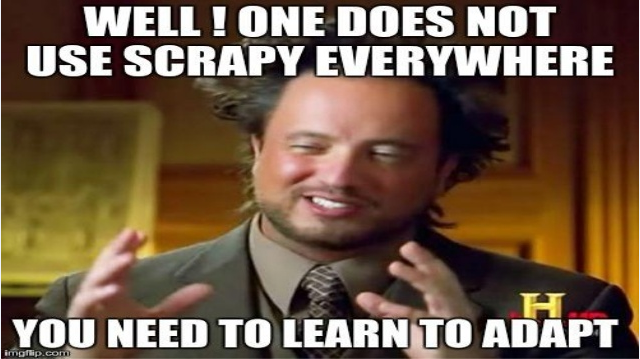

# 9) BONUS TRACK #2: Extracción de datos en Imagenes

In [76]:
url= 'C:/Users/ROM13066/Desktop/Archivos de ejemplos/cheque-no-negociable.JPG'
# Abrimos la imagen
im = Image.open(url)

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Utilizamos el método "image_to_string"
# Le pasamos como argumento la imagen abierta con Pillow
texto = pytesseract.image_to_string(im)

# Mostramos el resultado
print(texto)

JOSE LOPEZ

gecmea:sin1 Cuenta de Cheques
SAN SALVADOR, 9 DE SEPTIEMBRE

“Sue LAEMPRESA, S. A. DEC. V.

a suvane CIEN 00/100 DOLARES

HSBC <> ===

0000000 30000

» OCOOOOLL
CUATRO CUATRO
Us $109.00 /

José Lopez

 

00 30000"00000L ue"
(SGummmal OO. 000
